# Testing Julia - first steps using linear algebra

At the beginning of the file, we have to load the packages that we want in this notebook. Here "LinearAlgebra" and "Plots".

In [1]:
using LinearAlgebra

In [2]:
using Plots

In the computing lab on tensor network renormalization, we will define tensors as multidimensional arrays. Here is 4-dimensional example.

That way we also see how to define a function.

In [3]:
function define_array()
    
    result = zeros(Int,4,4,4,4) #This command creates a 4-dim array with a range of 4 each.
    #The entries are all zero and Integer.
    
    # As a next step, we change its values. We go through the entries using for loops.
    
    count = 0
    
    for i in 1:4, j in 1:4, k in 1:4, l in 1:4 #This is a short hand version for mulitple for loops
        
        # 1:4 just gives a vector with the entries 1,2,3,4
        
        count += 1 # Here we increase the value of the (local) variable count by 1.
        
        result[i,j,k,l] = count
        
    end
    
    result #As a last statement for end of the function means that we return the array result.
    
end

define_array (generic function with 1 method)

In [4]:
test_array = define_array()

4×4×4×4 Array{Int64,4}:
[:, :, 1, 1] =
   1   17   33   49
  65   81   97  113
 129  145  161  177
 193  209  225  241

[:, :, 2, 1] =
   5   21   37   53
  69   85  101  117
 133  149  165  181
 197  213  229  245

[:, :, 3, 1] =
   9   25   41   57
  73   89  105  121
 137  153  169  185
 201  217  233  249

[:, :, 4, 1] =
  13   29   45   61
  77   93  109  125
 141  157  173  189
 205  221  237  253

[:, :, 1, 2] =
   2   18   34   50
  66   82   98  114
 130  146  162  178
 194  210  226  242

[:, :, 2, 2] =
   6   22   38   54
  70   86  102  118
 134  150  166  182
 198  214  230  246

[:, :, 3, 2] =
  10   26   42   58
  74   90  106  122
 138  154  170  186
 202  218  234  250

[:, :, 4, 2] =
  14   30   46   62
  78   94  110  126
 142  158  174  190
 206  222  238  254

[:, :, 1, 3] =
   3   19   35   51
  67   83   99  115
 131  147  163  179
 195  211  227  243

[:, :, 2, 3] =
   7   23   39   55
  71   87  103  119
 135  151  167  183
 199  215  231  247

[:, :, 3, 3] =
 

In [5]:
# The notation array[:,:,1,1] means all entries in the first two indices, which gives a matrix.

Tensor network renormalization algorithms employ a singular value decomposition at some point in order to split a tensor into two parts.

A singular value decomposition is a decomposition of a matrix $M$, similar to the eigenvalue decomposition. The singular value decomposition is more general and can be applied to all matrices, e.g. with different numbers of rows and columns.

$M_{AB} = \sum_{i=1}^N U_{Ai} \lambda_i (V^\dagger)_{iB}$

Each matrix is split into two matrices of singular vectors, with a diagonal matrix of singular values $\lambda_i$. The matrices $U$ and $V$ are unitary. The singular values $\lambda_i$ are ordered in size $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_N$ and always greater or equal to zero.

We will use the latter fact to approximate a matrix, by a matrix of smaller rank by truncating the number of singular values. In fact this is the best possible approximation.

In [6]:
length(test_array[:,1,1,1]) # This returns the index range of the first index of test_array

4

In [7]:
function define_matrix(array::Array{Int64,4}) # We can pass objects to functions.
    # These objects can be of different type, Int, Float, etc. They need not be specified.
    # Here I pass an array with 4 entries.
    
    # Here we will simply combine two indices of the array into one index of the matrix.
    
    len = 4^2 #Length of the combined index, simply squared
    
    mat = zeros(Int,len,len) #Initialize a 2-dim array with index lengths len
    
    index1 = 0 
    
    for i in 1:4, j in 1:4 # We combine the indices i and j into index1
        
        index1 += 1
        
        index2 = 0
        
        for k in 1:4, l in 1:4 # We combine the indices k and l into index2
            
            index2 += 1
            
            mat[index1,index2] = array[i,j,k,l] # i is first index of array, j second etc.
            
        end
        
    end
    
    return mat
    
end

define_matrix (generic function with 1 method)

In [8]:
test_matrix = define_matrix(test_array)

16×16 Array{Int64,2}:
   1    2    3    4    5    6    7    8  …   10   11   12   13   14   15   16
  17   18   19   20   21   22   23   24      26   27   28   29   30   31   32
  33   34   35   36   37   38   39   40      42   43   44   45   46   47   48
  49   50   51   52   53   54   55   56      58   59   60   61   62   63   64
  65   66   67   68   69   70   71   72      74   75   76   77   78   79   80
  81   82   83   84   85   86   87   88  …   90   91   92   93   94   95   96
  97   98   99  100  101  102  103  104     106  107  108  109  110  111  112
 113  114  115  116  117  118  119  120     122  123  124  125  126  127  128
 129  130  131  132  133  134  135  136     138  139  140  141  142  143  144
 145  146  147  148  149  150  151  152     154  155  156  157  158  159  160
 161  162  163  164  165  166  167  168  …  170  171  172  173  174  175  176
 177  178  179  180  181  182  183  184     186  187  188  189  190  191  192
 193  194  195  196  197  198  199  200   

Now we will split this matrix via a SVD. The algorithm is called svd()

In [9]:
decomp = svd(test_matrix)

SVD{Float64,Float64,Array{Float64,2}}([-0.0145417 -0.47721 … 0.00063215 -8.11381e-5; -0.0415193 -0.430164 … -0.0439117 -0.0379026; … ; -0.392229 0.181442 … -0.121057 -0.151787; -0.419207 0.228489 … -0.0897977 -0.019227], [2371.47, 36.703, 2.18744e-13, 1.93229e-14, 4.85062e-15, 3.31781e-15, 1.9195e-15, 1.7607e-15, 6.68182e-16, 6.27723e-16, 4.50312e-16, 4.33696e-16, 2.03852e-16, 9.1788e-17, 3.14262e-17, 2.0601e-17], [-0.238935 -0.240398 … -0.25942 -0.260883; 0.413342 0.359129 … -0.345639 -0.399851; … ; -0.00283039 -0.0439496 … -0.24737 -0.0517477; -0.00369406 -0.022683 … 0.348603 0.0407458])

It returns a particular type, called SVD object. It contains two matrices, $U$ and $V$, and a vector for the singular values.

We can access these separate objects as follows

In [10]:
decomp.U # returns U / matrix of left singular vectors

16×16 Array{Float64,2}:
 -0.0145417  -0.47721      0.877905    0.0356598  …   0.00063215  -8.11381e-5
 -0.0415193  -0.430164    -0.228047    0.0126223     -0.0439117   -0.0379026 
 -0.068497   -0.383117    -0.206071   -0.0760275     -0.014234     0.0355871 
 -0.0954746  -0.336071    -0.182284   -0.0945369      0.0340277   -0.0358852 
 -0.122452   -0.289024    -0.155852   -0.141728      -0.076995    -0.0513588 
 -0.14943    -0.241977    -0.130402   -0.113568   …  -0.337539    -0.0636851 
 -0.176408   -0.194931    -0.116926    0.174946      -0.0371312    0.302407  
 -0.203385   -0.147884    -0.0790673  -0.150308       0.150812     0.0396611 
 -0.230363   -0.100838    -0.066389    0.16775        0.628319    -0.628628  
 -0.257341   -0.053791    -0.053389    0.485636       0.191314     0.494272  
 -0.284318   -0.00674436  -0.0147308   0.147165   …  -0.281549     0.0328115 
 -0.311296    0.0403022    0.0207945  -0.15108       -0.355723    -0.245003  
 -0.338274    0.0873488    0.0610389  -0

In [11]:
decomp.S # returns S / vector of singular values
# It drops off quickly!

16-element Array{Float64,1}:
 2371.4697745275225       
   36.70297675092284      
    2.1874358375259716e-13
    1.932294941733821e-14 
    4.850616525069149e-15 
    3.3178076368202656e-15
    1.919497668944498e-15 
    1.7607048654808919e-15
    6.681818928924322e-16 
    6.277226289603507e-16 
    4.503119525393135e-16 
    4.3369600867093563e-16
    2.038519082565345e-16 
    9.178801237252475e-17 
    3.1426202195463304e-17
    2.0600971023587986e-17

In [12]:
decomp.V # returns V / matrix of right singular vectors

16×16 Adjoint{Float64,Array{Float64,2}}:
 -0.238935   0.413342    0.343374    -0.807026   …  -0.00283039  -0.00369406
 -0.240398   0.359129   -0.231413     0.190344      -0.0439496   -0.022683  
 -0.241861   0.304916   -0.196348     0.144926      -0.0219273    0.0622751 
 -0.243324   0.250703    0.28938      0.324441      -0.0964564    0.431118  
 -0.244788   0.19649    -0.128931     0.0992181     -0.167156     0.353492  
 -0.246251   0.142277   -0.551504    -0.119508   …  -0.0743893   -0.266536  
 -0.247714   0.0880644   0.39336      0.26818       -0.0882288   -0.485153  
 -0.249177   0.0338516  -0.0264645    0.0919665      0.617871    -0.0679058 
 -0.250641  -0.0203613   0.00899613   0.0714037     -0.174363    -0.341855  
 -0.252104  -0.0745742   0.0406676    0.0675812     -0.022053    -0.131256  
 -0.253567  -0.128787    0.0759195    0.0171444  …   0.479403     0.299421  
 -0.25503   -0.183       0.109032     0.0196721      0.191193    -0.081055  
 -0.256493  -0.237213    0.144965  

In [13]:
decomp.V' # return V^\dagger

16×16 Array{Float64,2}:
 -0.238935     -0.240398   -0.241861   …  -0.257957    -0.25942    -0.260883 
  0.413342      0.359129    0.304916      -0.291426    -0.345639   -0.399851 
  0.343374     -0.231413   -0.196348      -0.271707    -0.2403      0.240972 
 -0.807026      0.190344    0.144926      -0.167327    -0.204626   -0.0254334
 -0.0279483    -0.79002     0.281199       0.131557     0.0594036  -0.346012 
 -0.0366584    -0.232357   -0.0114917  …  -0.459962    -0.295669    0.433644 
  0.011879     -0.0633875   0.179315       0.00193742   0.0972702   0.51369  
  0.0138198     0.0259141  -0.128892       0.414475    -0.553956   -0.0195393
 -0.00910297    0.134537    0.24255        0.272738    -0.0255526   0.227439 
  0.00869267   -0.0785152   0.352167       0.31024     -0.125884    0.113255 
 -0.0113125     0.101279   -0.0247876  …  -0.00320121   0.183981   -0.0556296
 -0.00386241    0.0369098  -0.315139      -0.145062     0.21606    -0.103957 
  0.00903117   -0.0058126   0.595635    

We can reconstruct the matrix test_matrix from the SVD data

In [14]:
decomp.U * Diagonal(decomp.S) * decomp.V' # Notice that the type of the object has changed.

16×16 Array{Float64,2}:
   1.0    2.0    3.0    4.0    5.0  …   12.0   13.0   14.0   15.0   16.0
  17.0   18.0   19.0   20.0   21.0      28.0   29.0   30.0   31.0   32.0
  33.0   34.0   35.0   36.0   37.0      44.0   45.0   46.0   47.0   48.0
  49.0   50.0   51.0   52.0   53.0      60.0   61.0   62.0   63.0   64.0
  65.0   66.0   67.0   68.0   69.0      76.0   77.0   78.0   79.0   80.0
  81.0   82.0   83.0   84.0   85.0  …   92.0   93.0   94.0   95.0   96.0
  97.0   98.0   99.0  100.0  101.0     108.0  109.0  110.0  111.0  112.0
 113.0  114.0  115.0  116.0  117.0     124.0  125.0  126.0  127.0  128.0
 129.0  130.0  131.0  132.0  133.0     140.0  141.0  142.0  143.0  144.0
 145.0  146.0  147.0  148.0  149.0     156.0  157.0  158.0  159.0  160.0
 161.0  162.0  163.0  164.0  165.0  …  172.0  173.0  174.0  175.0  176.0
 177.0  178.0  179.0  180.0  181.0     188.0  189.0  190.0  191.0  192.0
 193.0  194.0  195.0  196.0  197.0     204.0  205.0  206.0  207.0  208.0
 209.0  210.0  211.0  212.0

Let us try to approximate the matrix by another matrix of lower rank.

Let us start with rank 1.

In [15]:
decomp.U[:,1] * decomp.S[1] * transpose(decomp.V'[1,:]) # Notation is always a bit subtle
# the transpose is necessary to create a matrix

16×16 Array{Float64,2}:
   8.2397    8.29016    8.34061  …    8.89567    8.94613    8.99659
  23.526    23.67      23.8141       25.3989    25.543     25.687  
  38.8122   39.0499    39.2876       41.9021    42.1398    42.3775 
  54.0985   54.4298    54.7611       58.4053    58.7366    59.0679 
  69.3847   69.8097    70.2346       74.9085    75.3335    75.7584 
  84.671    85.1895    85.708    …   91.4118    91.9303    92.4488 
  99.9573  100.569    101.182       107.915    108.527    109.139  
 115.244   115.949    116.655       124.418    125.124    125.83   
 130.53    131.329    132.129       140.921    141.721    142.52   
 145.816   146.709    147.602       157.425    158.318    159.211  
 161.102   162.089    163.075    …  173.928    174.914    175.901  
 176.389   177.469    178.549       190.431    191.511    192.591  
 191.675   192.849    194.022       206.934    208.108    209.282  
 206.961   208.229    209.496       223.438    224.705    225.972  
 222.247   223.608    22

In [16]:
decomp.U[:,1] * decomp.S[1] * transpose(decomp.V[:,1]) # Notation is always a bit subtle
# This is an alternative way to write it. V is real, so we can do not need to conjugate.

16×16 Array{Float64,2}:
   8.2397    8.29016    8.34061  …    8.89567    8.94613    8.99659
  23.526    23.67      23.8141       25.3989    25.543     25.687  
  38.8122   39.0499    39.2876       41.9021    42.1398    42.3775 
  54.0985   54.4298    54.7611       58.4053    58.7366    59.0679 
  69.3847   69.8097    70.2346       74.9085    75.3335    75.7584 
  84.671    85.1895    85.708    …   91.4118    91.9303    92.4488 
  99.9573  100.569    101.182       107.915    108.527    109.139  
 115.244   115.949    116.655       124.418    125.124    125.83   
 130.53    131.329    132.129       140.921    141.721    142.52   
 145.816   146.709    147.602       157.425    158.318    159.211  
 161.102   162.089    163.075    …  173.928    174.914    175.901  
 176.389   177.469    178.549       190.431    191.511    192.591  
 191.675   192.849    194.022       206.934    208.108    209.282  
 206.961   208.229    209.496       223.438    224.705    225.972  
 222.247   223.608    22

The approximation is not too bad. Let us improve it by taking the second singular value into account.

In [17]:
decomp.U[:,1] * decomp.S[1] * transpose(decomp.V'[1,:]) +
decomp.U[:,2] * decomp.S[2] * transpose(decomp.V'[2,:]) # Julia understand that you want to add two matrices

16×16 Array{Float64,2}:
   1.0    2.0    3.0    4.0    5.0  …   12.0   13.0   14.0   15.0   16.0
  17.0   18.0   19.0   20.0   21.0      28.0   29.0   30.0   31.0   32.0
  33.0   34.0   35.0   36.0   37.0      44.0   45.0   46.0   47.0   48.0
  49.0   50.0   51.0   52.0   53.0      60.0   61.0   62.0   63.0   64.0
  65.0   66.0   67.0   68.0   69.0      76.0   77.0   78.0   79.0   80.0
  81.0   82.0   83.0   84.0   85.0  …   92.0   93.0   94.0   95.0   96.0
  97.0   98.0   99.0  100.0  101.0     108.0  109.0  110.0  111.0  112.0
 113.0  114.0  115.0  116.0  117.0     124.0  125.0  126.0  127.0  128.0
 129.0  130.0  131.0  132.0  133.0     140.0  141.0  142.0  143.0  144.0
 145.0  146.0  147.0  148.0  149.0     156.0  157.0  158.0  159.0  160.0
 161.0  162.0  163.0  164.0  165.0  …  172.0  173.0  174.0  175.0  176.0
 177.0  178.0  179.0  180.0  181.0     188.0  189.0  190.0  191.0  192.0
 193.0  194.0  195.0  196.0  197.0     204.0  205.0  206.0  207.0  208.0
 209.0  210.0  211.0  212.0

The approximation is perfect, since all other singular values are tiny in comparison.

## Simple plot

As a last step, let us plot something to test whether plot is working.

Let us just plot 10 random numbers

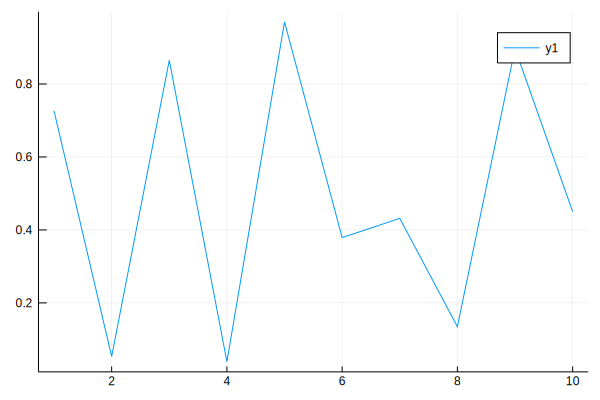

In [18]:
plot(1:10,rand(10))

The first vector describes the entries on the x-axis, the second vector for the y-axis.

We can also plot multiple functions.

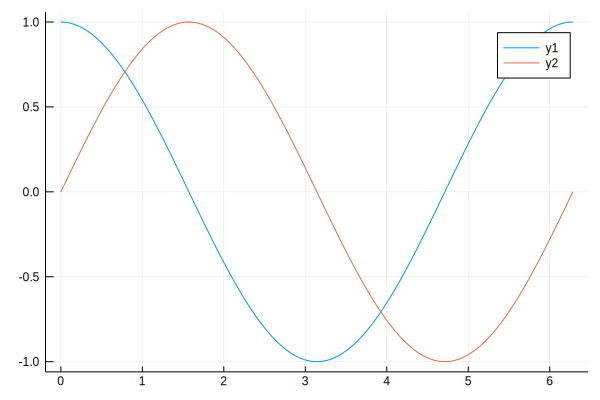

In [19]:
plot(pi/50*(0:100),[cos.(pi/50*(0:100)),sin.(pi/50*(0:100))]) # cos. just means that cos is applied
# to each entry of the vector